In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import fetch_openml


## Q1

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


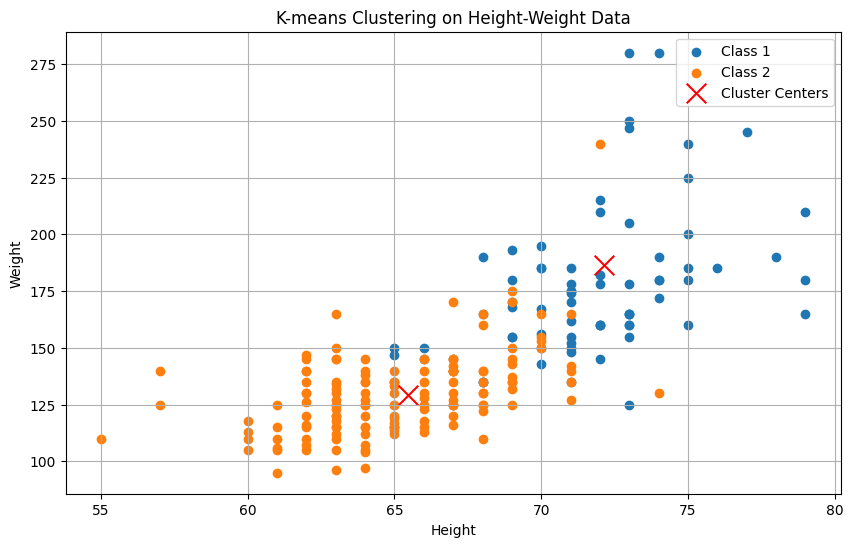

In [4]:
# Load dataset
heightWeightData = pd.read_csv('/content/drive/MyDrive/comp4702/heightWeightData.csv', header=None).to_numpy()

# sort and extract sorted height and weight
heightWeightData = heightWeightData[heightWeightData[:, 0].argsort()]
height_weight = heightWeightData[:, 1:3]
true_labels = heightWeightData[:, 0]  # actual class labels (for colouring)

# number of unique classes for colouring
n_clusters = np.unique(true_labels).shape[0]

# TODO: Extract inputs and n_clusters
height_weight = heightWeightData[:, 1:3]
n_clusters = np.unique(heightWeightData[:, 0]).shape[0]

# TODO: Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(height_weight)
cluster_centers = kmeans.cluster_centers_

# Plot the data
plt.figure(figsize=(10, 6))

for label in np.unique(true_labels):  # iterate over class labels
    indices = (true_labels == label)  # get indices for class
    plt.scatter(height_weight[indices, 0], height_weight[indices, 1], label=f'Class {int(label)}')

# TODO: Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

# Add labels and legend
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('K-means Clustering on Height-Weight Data')
plt.legend()
plt.grid(True)
plt.show()

## Q2

In [40]:
def pca(X, n_components):
    """
    Perform PCA on the dataset X and return the top n_components principal components.

    Parameters:
    X (numpy.ndarray): The data matrix (each row is a sample, each column is a feature).
    n_components (int): The number of principal components to return.

    Returns:
    numpy.ndarray: The transformed data matrix with the top n_components principal components.
    numpy.ndarray: The principal components (eigenvectors).
    numpy.ndarray: The explained variance (eigenvalues).
    """
    # TODO: Standardize the data (zero mean, unit variance)
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0) + 1e-8
    X_std = (X - mean) / std

    # TODO: Calculate the covariance matrix
    cov_matrix = np.cov(X_std, rowvar=False)

    # TODO: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # TODO: Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # TODO: Select the top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    # TODO: Project the data onto the principal components
    X_pca = np.dot(X_std, selected_eigenvectors)

    return X_pca, selected_eigenvectors, sorted_eigenvalues

## Q3

In [47]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data.to_numpy()  # Convert to NumPy array
y = mnist.target.astype(int)  # Convert labels to integers


# Apply PCA
n_components = 2  # reduce MNIST to 2D for visualisation
X_pca, components, all_eigenvalues = pca(X, n_components)


## Q4

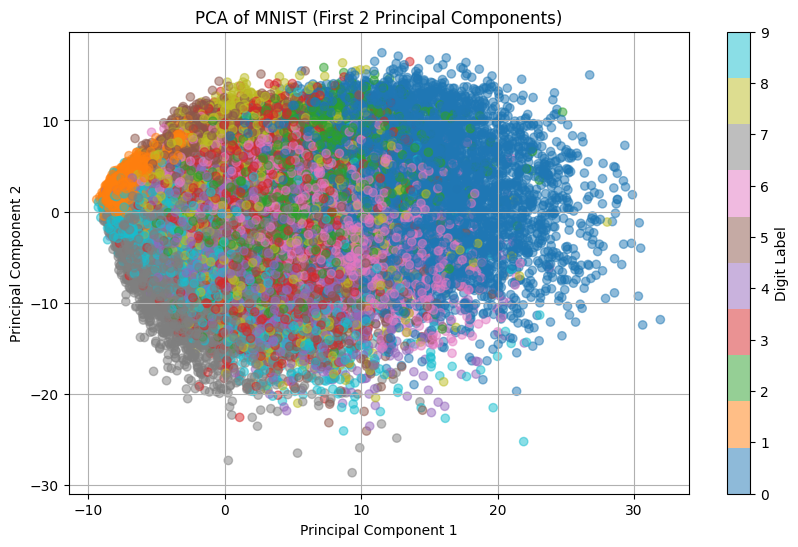

In [44]:
# TODO: Plot the first two principal components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of MNIST (First 2 Principal Components)")
plt.grid(True)
plt.show()

## Q5

In [48]:
# TODO: Calculate the percentage of variance explained by the first two principal components

# according to google: variance = (pc(x) / sum(eigenvalues)) ** 100
total_variance = np.sum(all_eigenvalues)  # Sum of all eigenvalues
variance_explained_ratio = (np.sum(all_eigenvalues[:n_components]) / total_variance) * 100


print(f"Variance explained by the first two principal components: {variance_explained_ratio:.2f}%")

Variance explained by the first two principal components: 9.68%


## Q6

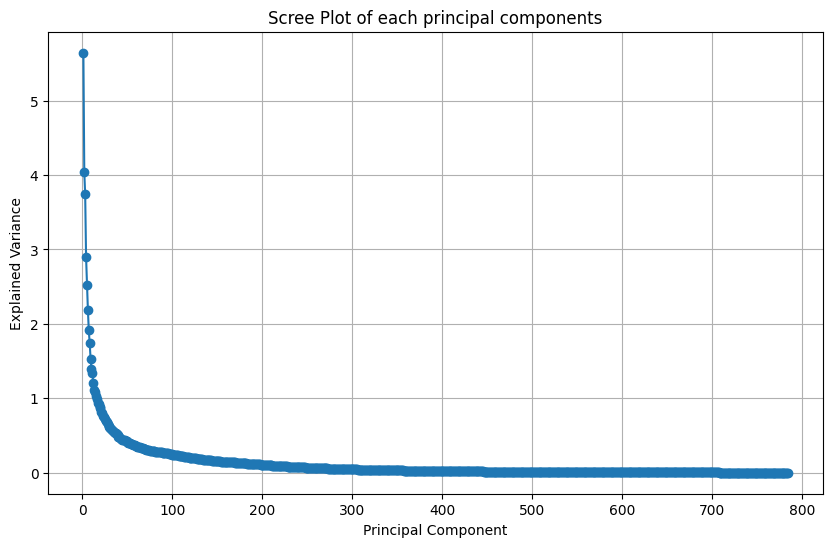

In [50]:
# TODO: Plot the Scree plot
explained_variance_ratio = (all_eigenvalues / total_variance) * 100  # Compute for all components

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of each principal components")
plt.grid(True)
plt.show()

## Q7

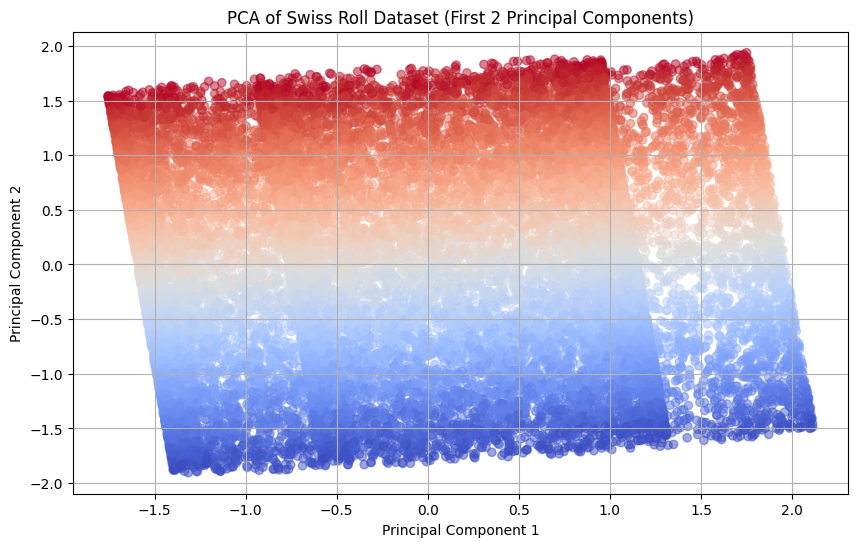

Variance explained by the first two principal components: 68.85%


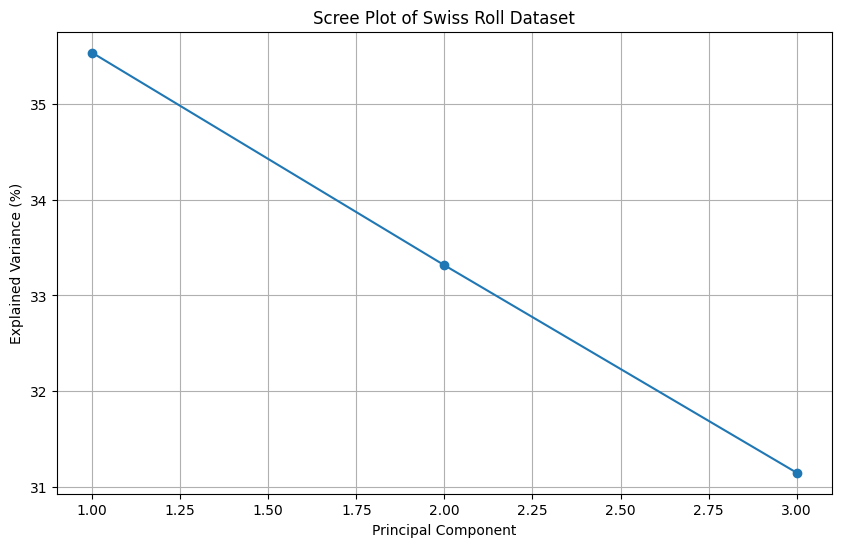

Eigenvalues:  [1.06615339 0.99952427 0.93447233]


In [64]:
swissroll = np.loadtxt('/content/drive/MyDrive/comp4702/swissroll.txt')


# Q3: Perform PCA and get the top 2 principal components
X = swissroll[:, :3]  #3 cols

n_components = 2  # 2d for visualisation
X_pca, components, all_eigenvalues = pca(X, n_components)

# Q4: Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=X[:, 2], cmap='coolwarm', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Swiss Roll Dataset (First 2 Principal Components)")
plt.grid(True)
plt.show()


# Q5: Calculate the percentage of variance explained by the first two principal components
total_variance = np.sum(all_eigenvalues)
variance_explained_ratio = (np.sum(all_eigenvalues[:n_components]) / total_variance) * 100
print(f"Variance explained by the first two principal components: {variance_explained_ratio:.2f}%")


# Q6: Plot the Scree plot
explained_variance_ratio = (all_eigenvalues / total_variance) * 100
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of Swiss Roll Dataset")
plt.grid(True)
plt.show()

print("Eigenvalues: ", all_eigenvalues[:10])

## Observations

- variances decrease gradually in the scree plot, rather than a sharp decrease from the first component (as seen in the heightweight scree plot)
- pca doesnt favour any main directions (data has significant variance across all dimensions maybe??). also because eigenvalues are close together
- swissroll is non linear, pca only works on linear variance. all dimensions probably contribute equally ish to the variance since its nonlinear

